# Time Series with Pandas Project Exercise

데이터 출처: https://fred.stlouisfed.org/series/UMTMVS

'모든 제조 산업에 대한 제조업체 출하 가치' Total Manufacturing 데이터

**필요한 라이브러리를 가져옵니다.**

In [46]:
import numpy as np
import pandas as pd
%matplotlib inline

**데이터 폴더에서 데이터 UMMVS.csv 파일 읽기**

In [47]:
df = pd.read_csv('Data/UMTMVS.csv', encoding='utf8')

**데이터 헤드 확인**

In [48]:
df.head()

,DATE,UMTMVS
0,1992-01-01,209438.0
1,1992-02-01,232679.0
2,1992-03-01,249673.0
3,1992-04-01,239666.0
4,1992-05-01,243231.0


**DATE 열을 인덱스로 설정.**

In [49]:
df.set_index('DATE', inplace = True)
df.head()

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


**인덱스의 데이터 유형을 확인.**

In [50]:
df.index

Index(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01', '1992-05-01',
       '1992-06-01', '1992-07-01', '1992-08-01', '1992-09-01', '1992-10-01',
       ...
       '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
       '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'],
      dtype='object', name='DATE', length=325)

**인덱스를 날짜/시간 인덱스로 변환**

In [51]:
df.index = pd.to_datetime(df.index)

In [52]:
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

**데이터를 시각화하고 적절한 그림 크기를 선택하기.**

<AxesSubplot:xlabel='DATE'>

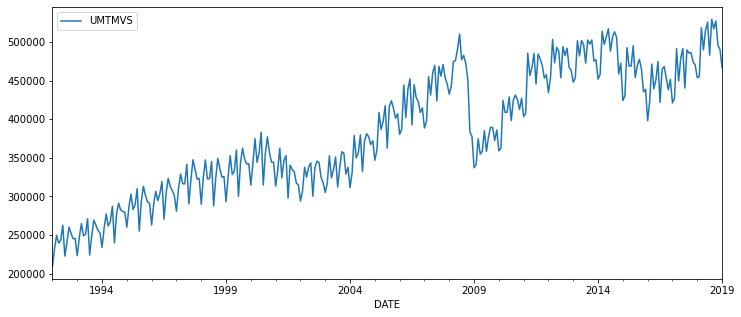

In [53]:
df.plot(figsize = (12, 5))

**2009년 1월부터 2019년 1월까지, Total Manufacturing은 얼마나 증가하였는가? (percent) **

In [55]:
(df.loc['2019-01-01'] - df.loc['2009-01-01']) / df.loc['2009-01-01'] * 100

UMTMVS    38.472149
dtype: float64

**2008년 1월부터 2009년 1월까지 Total Manufacturing은 얼마나 감소하였는가?**

In [56]:
(df.loc['2009-01-01'] - df.loc['2008-01-01']) / df.loc['2008-01-01'] * 100

UMTMVS   -22.022775
dtype: float64

**2005년 이후 가장 가치가 낮은 달은?**

In [57]:
df.loc['2005-01-01':].idxmin()

UMTMVS   2009-01-01
dtype: datetime64[ns]

**가장 가치가 높았던 top5 month를 구하시오**

In [66]:
df.sort_values('UMTMVS', ascending = False).iloc[:5]

,UMTMVS
DATE,
2018-08-01,529157.0
2018-10-01,527031.0
2018-06-01,525660.0
2018-03-01,518285.0
2018-09-01,516992.0


In [67]:
df.sort_values('UMTMVS', ascending = False).iloc[:5].index.month

Int64Index([8, 10, 6, 3, 9], dtype='int64', name='DATE')

**2008년 1월부터 2009년 1월까지의 감소량은?**

In [69]:
abs(df.loc['2009-01-01'] - df.loc['2008-01-01'])

UMTMVS    95206.0
dtype: float64

**연도별로 Average를 나타내는 barplot을 시각화 하시오**

<AxesSubplot:xlabel='DATE'>

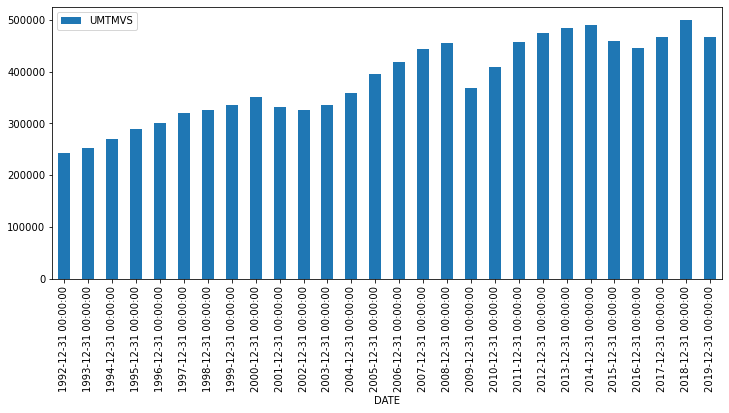

In [75]:
df.resample('Y').mean().plot.bar(figsize = (12, 5))

**연 평균 값이 가장 크게 증가한 년도는?**

In [77]:
Year_average = df.resample('Y').mean()

In [81]:
Year_average_shift = Year_average.shift(1)
Year_average_shift.head()

,UMTMVS
DATE,
1992-12-31,NaN
1993-12-31,242002.000000
1994-12-31,251708.083333
1995-12-31,269842.666667
1996-12-31,289973.083333


In [83]:
(Year_average - Year_average_shift).idxmax()

UMTMVS   2011-12-31
dtype: datetime64[ns]

**실제 데이터 위에 연도별 rolling mean을 시각화 하시오.**

hint: df['UMTMVS'].rolling(window=12).mean()

In [86]:
df['Yearly Mean'] = df['UMTMVS'].rolling(window = 12).mean()

In [88]:
df

,UMTMVS,Yearly Mean
DATE,,
1992-01-01,209438.0,NaN
1992-02-01,232679.0,NaN
1992-03-01,249673.0,NaN
1992-04-01,239666.0,NaN
1992-05-01,243231.0,NaN
...,...,...
2018-09-01,516992.0,493075.583333
2018-10-01,527031.0,496482.333333
2018-11-01,495901.0,498308.833333


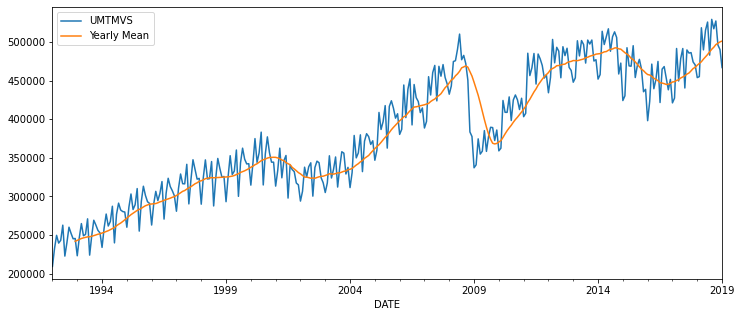

In [90]:
df.plot(figsize = (12, 5)).autoscale(axis = 'x', tight = True)

**BONUS QUESTION (HARD).**

2008년의 어떤 달에는 그 해의 가치가 최고조에 달했습니다.

2008년의 최고점을 넘어서는 데 몇 개월이 걸렸습니까?

참고: 시작 및 종료 월을 계산하는지 여부에 따라 70, 69, 68 등을 얻을 수 있습니다.

In [92]:
df['2008-01-01' : '2008-12-01']['UMTMVS'].max()

510081.0

In [94]:
first = df['2009-01-01':]['UMTMVS'][df['2009-01-01':]['UMTMVS'] > df['2008-01-01' : '2008-12-01']['UMTMVS'].max()].index[0]

In [96]:
len(df['2008-06-01' : first])

70

# GREAT JOB!